# 시계열 데이터 확인

차분(diff)는 다른 02, 03을 참고

## #01. 작업준비

### #1) 패키지

In [1]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# adfuller를 사용해 데이터가 정상성을 만족하는지 판단 가능
from statsmodels.tsa.stattools import adfuller
# 계절요인
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sb
import sys

### #2) 데이터

시계열 분석시 `주의사항`은 `인덱스가 시간 혹은 날짜로 설정되어 있는지`와 `결측치 및 이상치의 확인`이다. 

In [2]:
df = read_excel("https://data.hossam.kr/E06/air_passengers.xlsx", index_col="Month")
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### #) 그래프 초기화

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터 살펴보기

### #01) 기초 통계량

In [4]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### #2) 결측치 확인

In [5]:
df.isna().sum()

Passengers    0
dtype: int64

> 결측치 없음을 확인

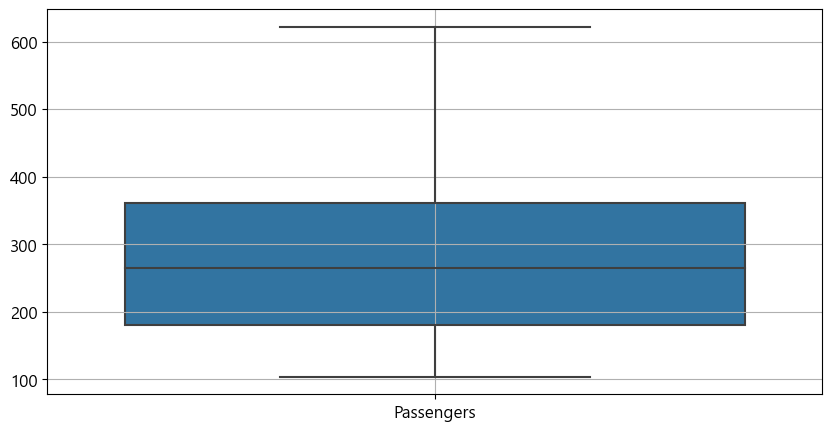

In [6]:
plt.figure()
sb.boxplot(data=df)
plt.grid()
plt.show()
plt.close()

> 이상치 없음 확인

### #4) 기본 형태의 시계열 그래프를 통한 `정상성` 확인

In [7]:
df.columns

Index(['Passengers'], dtype='object')

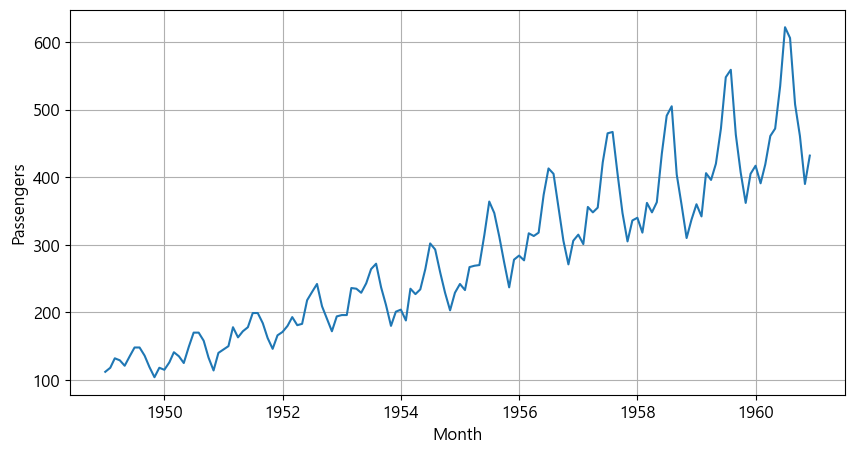

In [9]:
plt.figure()
# 데이터에서 컬럼이 1개인 경우 데이터의 index를 x로 지정 가능
sb.lineplot(df, x=df.index, y='Passengers')
plt.grid()
plt.show()
plt.close()

> 데이터의 패턴은 보이지만 `비정상성임`을 확인

### #5) ADF 테스트

`시계열 데이터`의 `정상성 여부를 판단`하기 위한 검정

#### ADF 테스트의 가설

| 가설 | 내용 |
|---|---|
| 귀무가설 | 데이터가 정상성과 다르다 (=비정상성임을 의미) |
| 대립가설 | 데이터가 정상성이다. |

In [10]:
# adfuller를 사용해 데이터가 정상성을 만족하는지 판단 가능

ar = adfuller(df['Passengers'])
# ar    
# adfuller(df)만 시각화한 결과 값의 의미를 알 수 없음

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values):')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

print('데이터 정상성 여부: ', '정상' if ar[1] < 0.05 else '비정상')

검정통계량(ADF Statistic): 0.815369
유의수준(p-value): 0.991880
최적차수(num of lags): 13.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values):
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부:  비정상


## #03. `평균 이동법`을 통한 시계열 데이터 분석

`가장 고전적인 시계열 데이터 분석 방법`

`주어진 구간의 평균`을 구해서 이어서 표시하는 것으로 `미래의 데이터를 예측`한다.

`평균 이동 결과가 실제 데이터와 얼마나 차이가 나는지의 여부`로 데이터를 판단

과거로부터 현재까지의 시계열 자료를 대상으로 일정기간별 평균이동을 계산하면 이들의 추세를 통해 다음 기간을 예측할 수 있다. 

### #1) 단순 이동평균 (SMA, Simple Moving Average)

`sma`사용

- 가장 많이 사용하는 방식

#### 3개월, 6개월, 9개월 단위 평균

In [11]:
df['sma3'] = df['Passengers'].rolling(3).mean()
df['sma9'] = df['Passengers'].rolling(6).mean()
df['sma6'] = df['Passengers'].rolling(9).mean()
df

,Passengers,sma3,sma9,sma6
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,120.666667,NaN,NaN
1949-04-01,129,126.333333,NaN,NaN
1949-05-01,121,127.333333,NaN,NaN
...,...,...,...,...
1960-08-01,606,587.666667,519.166667,480.888889
1960-09-01,508,578.666667,534.000000,492.333333
1960-10-01,461,525.000000,534.000000,497.222222


#### 서브플롯으로 단순 이동평균 그래프 시각화

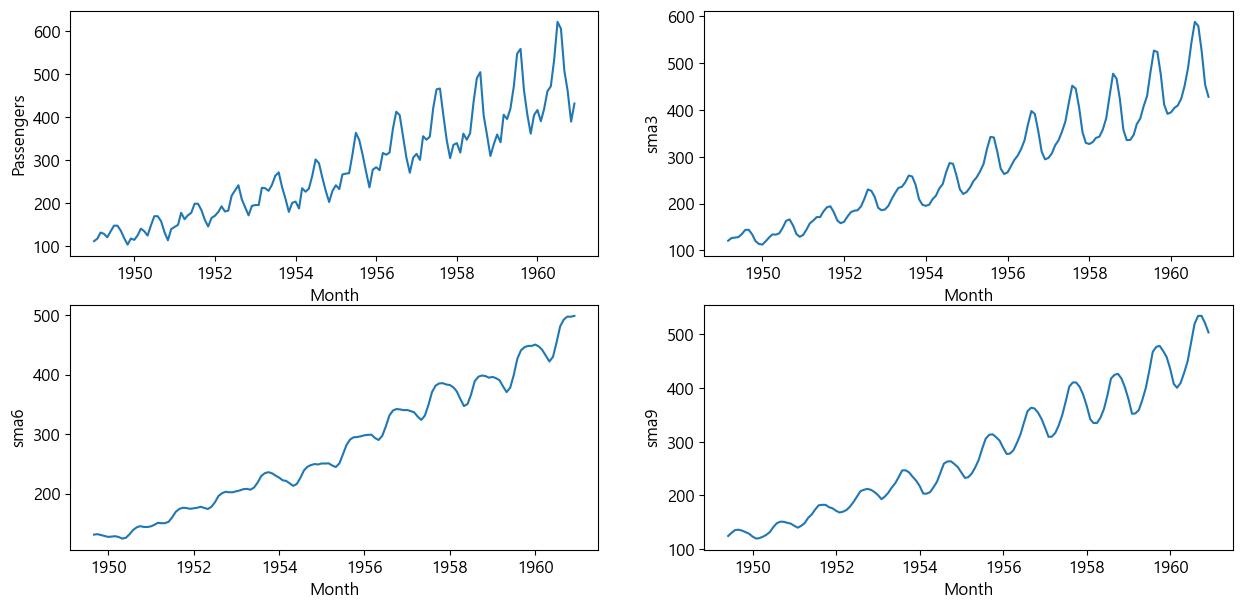

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,7))

sb.lineplot(df, x=df.index, y='Passengers', ax=ax1)
sb.lineplot(df, x=df.index, y='sma3', ax=ax2)
sb.lineplot(df, x=df.index, y='sma6', ax=ax3)
sb.lineplot(df, x=df.index, y='sma9', ax=ax4)

plt.show()
plt.close()

### #2)  지수 이동 평균 (EMA, Exponetial Moving Average)

`ewm`사용

보다 `최근의 값에 가중치`를 두면서 이동평균을 계산하는 방법

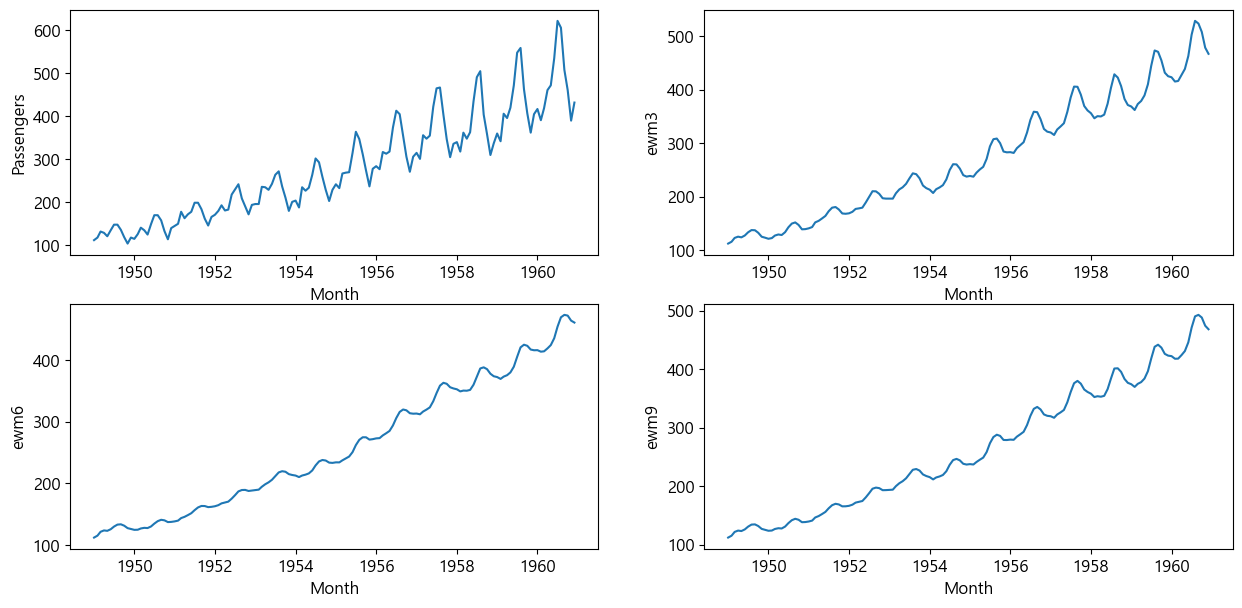

In [14]:
df['ewm3'] = df['Passengers'].ewm(3).mean()
df['ewm9'] = df['Passengers'].ewm(6).mean()
df['ewm6'] = df['Passengers'].ewm(9).mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,7))

sb.lineplot(df, x=df.index, y="Passengers", ax=ax1)
sb.lineplot(df, x=df.index, y="ewm3", ax=ax2)
sb.lineplot(df, x=df.index, y="ewm6", ax=ax3)
sb.lineplot(df, x=df.index, y="ewm9", ax=ax4)

plt.show()
plt.close()

## #04. ACF, PACF 검정

`정상 시계열 데이터`의 경우, `ACF는 상대적으로 빠르게 0(상관관계 0)에 접근`한다.

`비정상 시계열 데이터`의 경우, `ACF는 천천히 감소`하며 `종종 큰 양의 값`을 갖는다.

> 차분이 필요 없다고 판정되었으므로 원본 데이터로 진행한다.

| 구분 | $AR(p)$ 모델 적합 | $MA(q)$ 모델 적합 |
|---|---|---|
| ACF plot | 천천히 감소 | 첫 값으로부터 $q$개 뒤에 끊긴다. |
| PACF plot | 첫 값으로부터 $p$개 뒤에 끊긴다. | 천천히 감소 |

`추가` - 쉬운 설명
| 구분 | ACF plot | PACF plot |
|---|---|---|
| 감소 | 상대적으로 완만 | 상대적으로 급격 |
| 파란박스 진입 지점 | $p=1$ | $q=1$ |
| 적합 모델 | $AR(p)$ 모델 적합 | $MA(q)$ 모델 적합 |

### ACF Plot

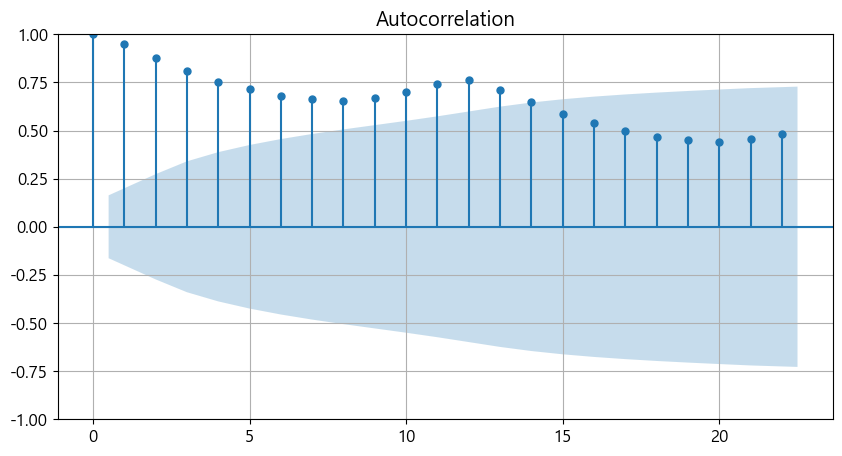

In [15]:
plot_acf(df["Passengers"])
plt.grid()
plt.show()
plt.close()

### PACF Plot

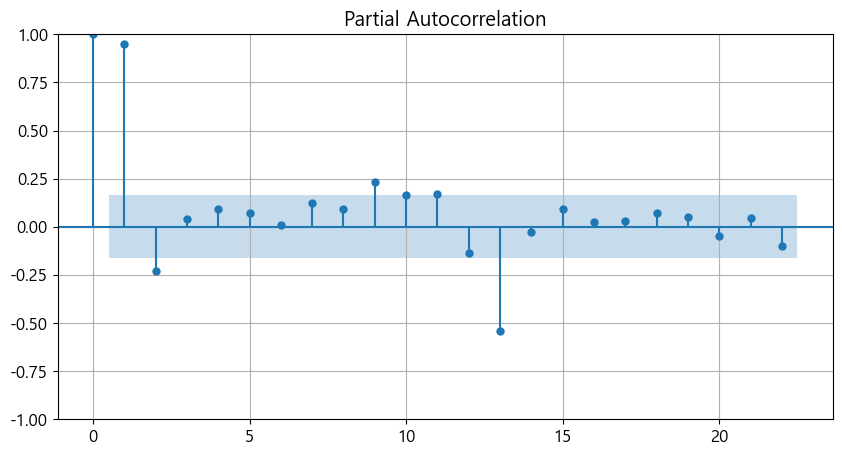

In [17]:
plot_pacf(df['Passengers'])
plt.grid()
plt.show()
plt.close()

### ACF, PACF 서브플롯

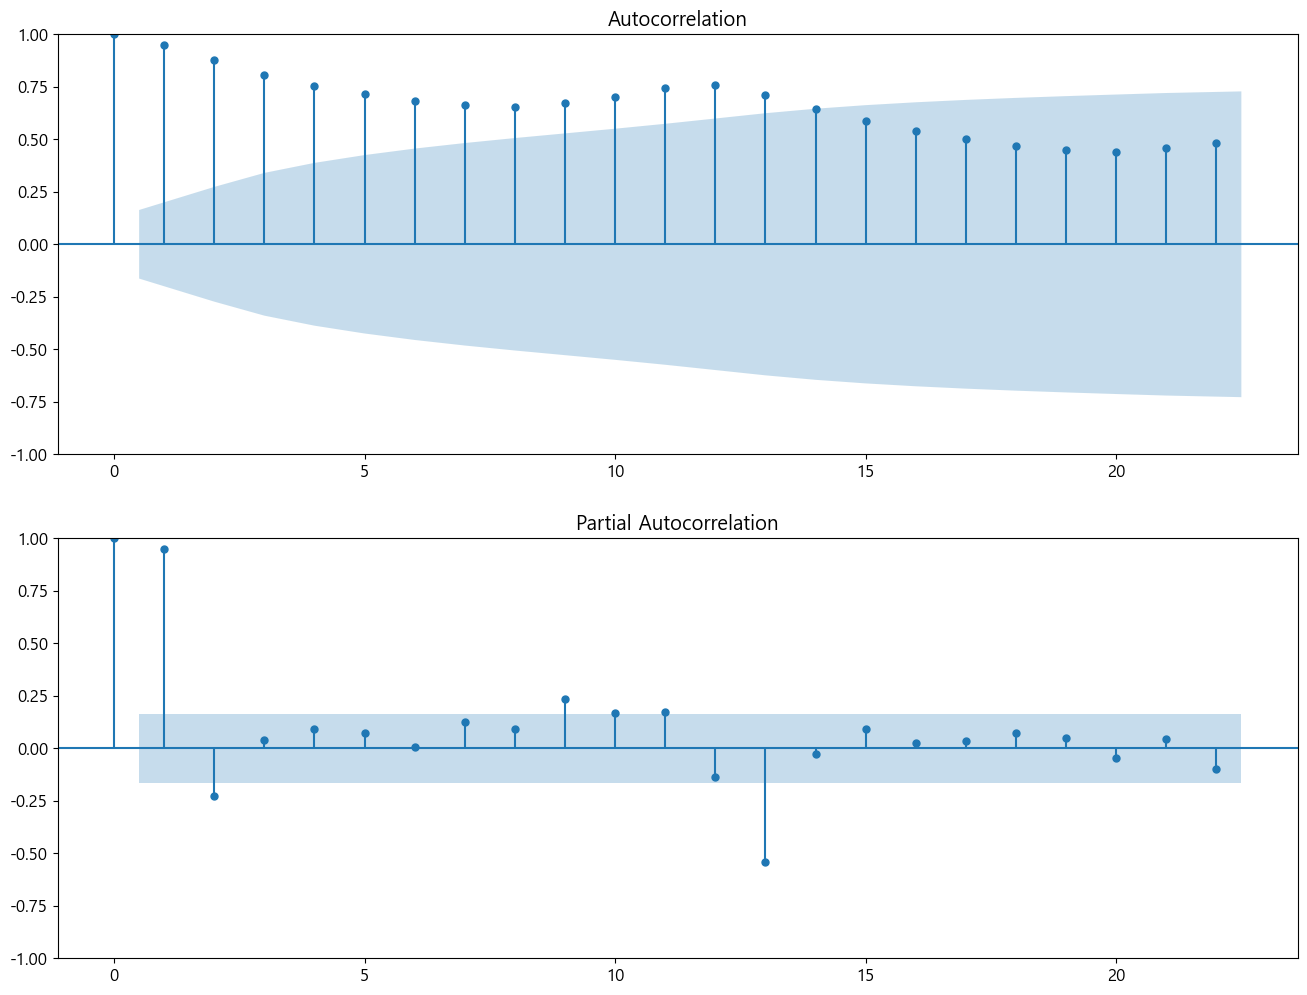

In [18]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,12))

plot_acf(df['Passengers'], ax=ax1)
plot_pacf(df['Passengers'], ax=ax2)
plt.show()
plt.close()

#### 결과 판정

| 구분 | ACF plot | PACF plot |
|---|---|---|
| 감소 | 상대적으로 완만 | 상대적으로 급격 |
| 파란박스 진입 지점 | $p=1$ | $q=1$ |

이 결과를 고려하여 `완만함을 보이는 ACF 플롯을 채택` 

$AR(1)$ 모델로 결정

`p-value가 0.05보다 작으`므로 `귀무가설을 기각하고 대립가설 채택`. 즉 예제 데이터는 정상성 데이터

만약 귀무가설이 채택되어 정상성이 아니라고 판단될 경우 차분을 1회 수행하고 다시 ADF 검정을 수행

대립가설이 채택될 때 까지 이 과정을 반복함

반복횟수가 $d$ 값이 됨 

> p-value의 기준
> - `P-value < 0.01` : 귀무가설이 옳을 확률이 `0.01` 이하 → 틀렸다(깐깐한 기준) --> `귀무가설 기각`, 대립가설 채택
> - `P-value < 0.05` : 귀무가설이 옳을 확률이 `0.05` 이하 → 틀렸다(일반적인 기준) --> `귀무가설 기각`, 대립가설 채택
> - `0.05 < P-value < 0.1` : 애매한 경우(샘플링을 다시한다)
> - `0.1 < P-value` : 귀무가설이 옳을 확률이 0.1 이상 → `귀무가설 기각 불가`, 틀리지 않았다(맞다와 다름)

## #05. 시계열 분해

시계열 자료를 추세(Trend), 계절성(Seasonal), 잔차(Rasid)로 분해하는 데이터 전처리 방법

| 구분 | 설명 |
|--|--|
| 가법모델(Additive Model) | 시계열 데이터를 구성하는 각 성분이 덧셈을 통해 연결되어 있다고 가정 |
| 승법모델(Multiplicative Model) | 각 성분이 곱셈을 통해 연결되어 있다고 가정<br/>승법 모델은 로그 변환을 통해 가법 모델로 쉽게 변환 가능함 |

모델 선택은 시계열 데이터의 특성을 고려하면 되는데, 아래 그림의 왼편 그래프와 같이 시간에 따른 데이터 변동이 일정한 경우는 가법 모델을 활용한 데이터 분해가 적합함

![model](res/model.png)

### Multiplicative Model 시계열 분해 (승법 모델 적용)

In [19]:
#model_name = 'additive'         # 가법 모델
model_name = 'multiplicative'   # 승법 모델

sd = seasonal_decompose(df['Passengers'], model=model_name)

# trend, seasonal, residual 데이터 프레임으로 변환
sd_df = DataFrame({
    '관측값': sd.observed,
    '트렌드': sd.trend,
    '계절성': sd.seasonal,
    '잔차': sd.resid
}, index=df.index)

sd_df

,관측값,트렌드,계절성,잔차
Month,,,,
1949-01-01,112.0,NaN,0.910230,NaN
1949-02-01,118.0,NaN,0.883625,NaN
1949-03-01,132.0,NaN,1.007366,NaN
1949-04-01,129.0,NaN,0.975906,NaN
1949-05-01,121.0,NaN,0.981378,NaN
...,...,...,...,...
1960-08-01,606.0,NaN,1.219911,NaN
1960-09-01,508.0,NaN,1.060492,NaN
1960-10-01,461.0,NaN,0.921757,NaN


#### 분석결과 시각화 (자동구현)

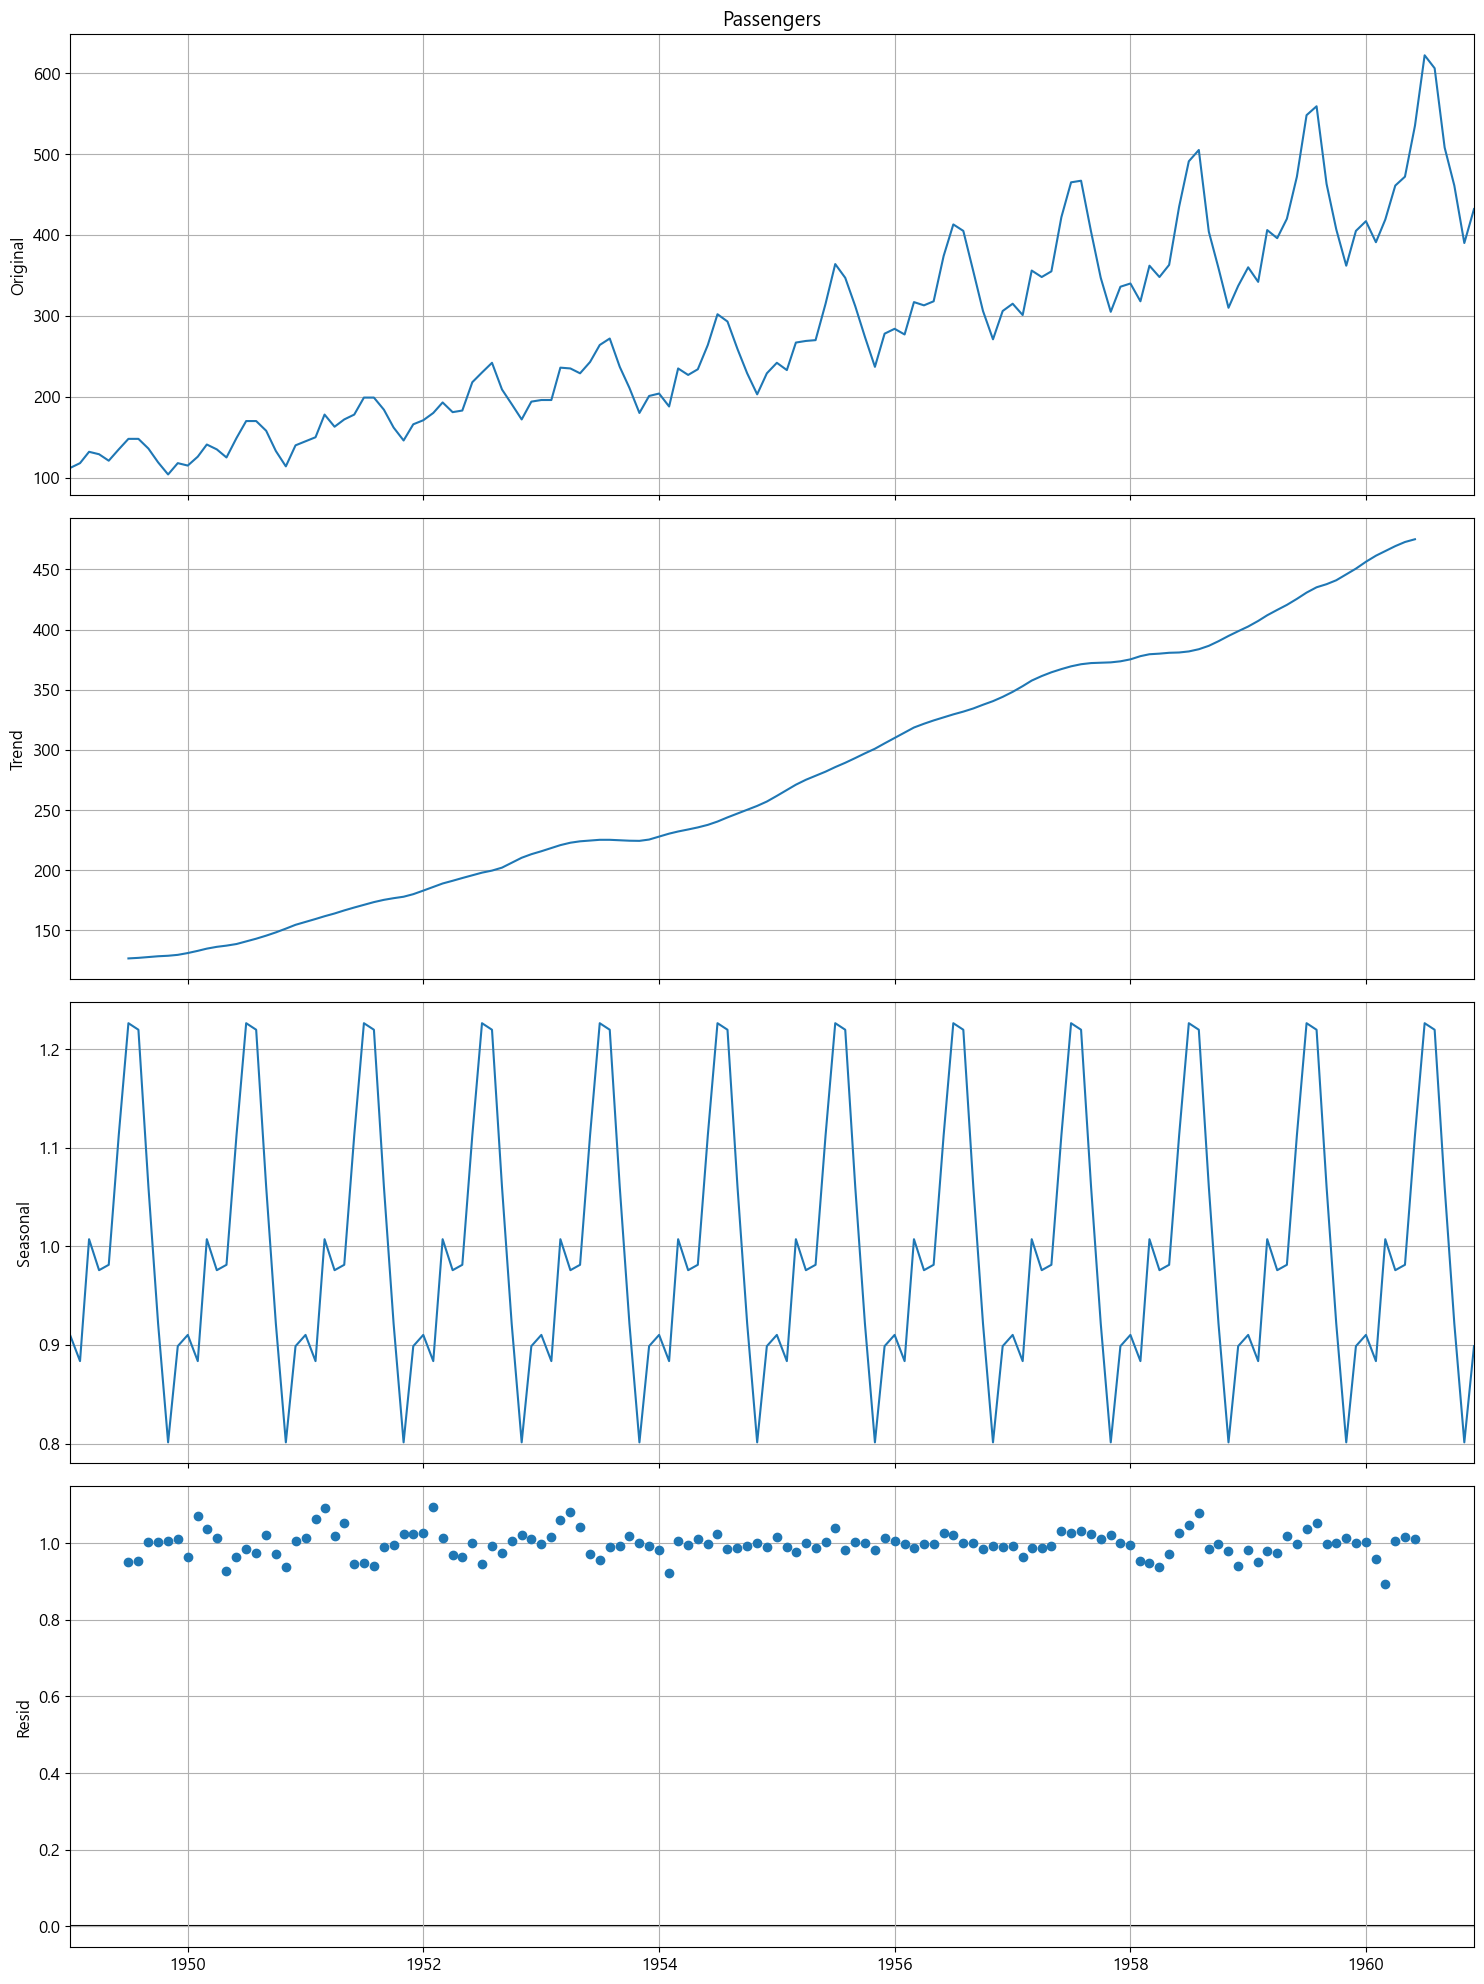

In [21]:
plt.rcParams["figure.figsize"] = (15, 20)
figure = sd.plot()
fig, ax1, ax2, ax3, ax4 = figure.get_children()

ax1.set_ylabel("Original")
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

plt.show()